# Evaluation - 2048/200

In [39]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils.evaluation import (
    get_all_test_data,
    get_table_column_names,
    load_evaluation_dataset
)

In [40]:
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [41]:
sns.set_palette("pastel")

### Set all the parameters

In [42]:
colors = ['#ff8b94', '#a8e6cf', '#70bbff']

In [43]:
llms = ["gemma_instruct", "llama3_instruct", "mistral_instruct"]
collection_selector = "2048_200"
collection_name = collection_selector.replace("_", "/")

**Get all the data from the evaluation table**

In [44]:
all_records = get_all_test_data(llm=False, collection_name=f"wiki_movie_plots_{collection_selector}_mxbai", chat_mode='CONTEXT')

In [45]:
number_of_records = len(all_records)
print(f"Number of records: {number_of_records}")

Number of records: 945


**Get the column names of the evaluation table as list**

In [46]:
column_names = get_table_column_names(table_name="evaluation")

In [47]:
column_names

['id',
 'llm_model',
 'embed_model',
 'collection_name',
 'question_id',
 'question',
 'context',
 'reference_answer',
 'response',
 'answer_feedback',
 'context_relevancy_score',
 'context_relevancy_feedback',
 'correctness_score',
 'correctness_feedback',
 'faithfulness_score',
 'relevancy_score',
 'relevancy_feedback',
 'model_score',
 'model_feedback',
 'chat_mode']

extract **data** without the index column 'id'

In [48]:
# data without id
data_without_id = [t[1:] for t in all_records]

In [49]:
# index
ids_only = [t[0] for t in all_records]

### Create a DataFrame

In [50]:
df = pd.DataFrame(data=data_without_id, index=ids_only, columns=column_names[1:])

display the first 5 rows

In [51]:
df.head()

,llm_model,embed_model,collection_name,question_id,question,context,reference_answer,response,answer_feedback,context_relevancy_score,context_relevancy_feedback,correctness_score,correctness_feedback,faithfulness_score,relevancy_score,relevancy_feedback,model_score,model_feedback,chat_mode
2962,oll_llama3_instruct,mxbai,wiki_movie_plots_2048_200_mxbai,0,"Who is the director of the movie ""The Karate K...",release_year: 1984\ntitle: The Karate Kid\nori...,"The director of the movie ""The Karate Kid"" rel...","According to the context information provided,...","1. Yes, the response directly addresses the qu...",1.0,1. The retrieved context matches the subject m...,4.5,The generated answer is highly relevant to the...,1.0,1.0,YES,1.0,Assistant A provided a more comprehensive resp...,CONTEXT
2963,oll_llama3_instruct,mxbai,wiki_movie_plots_2048_200_mxbai,1,"What is the plot of ""The Karate Kid"" released ...",release_year: 1984\ntitle: The Karate Kid\nori...,"The plot of ""The Karate Kid"" released in 1984 ...","According to the context information provided,...",1. Does the provided response match the subjec...,1.0,1. The retrieved context matches the subject m...,4.5,The generated answer provides a detailed and a...,1.0,1.0,YES,1.0,Assistant A provides a detailed and comprehens...,CONTEXT
2964,oll_llama3_instruct,mxbai,wiki_movie_plots_2048_200_mxbai,2,"What is the genre of the movie ""The Karate Kid...",release_year: 1984\ntitle: The Karate Kid\nori...,"The genre of the movie ""The Karate Kid"" releas...","According to the context information provided,...",1. Does the provided response match the subjec...,1.0,1. The retrieved context matches the subject m...,4.5,The generated answer is relevant to the user q...,0.0,1.0,YES,0.0,Assistant B provided a more comprehensive and ...,CONTEXT
2965,oll_llama3_instruct,mxbai,wiki_movie_plots_2048_200_mxbai,3,Who was the legendary boxing trainer that took...,release_year: 2016\ntitle: Hands of Stone\nori...,"Ray Arcel, an American legendary boxing traine...","According to the context information provided,...",1. The response correctly identifies Ray Arcel...,1.0,1. The retrieved context matches the subject m...,4.5,The generated answer is highly relevant to the...,1.0,1.0,YES,0.0,Assistant A correctly identifies the legendary...,CONTEXT
2966,oll_llama3_instruct,mxbai,wiki_movie_plots_2048_200_mxbai,4,What was the result of the rematch between Rob...,release_year: 2016\ntitle: Hands of Stone\nori...,"Durán famously gave up by saying ""No más"" to t...","According to the context information provided,...",1. The provided response matches the subject m...,1.0,1. The retrieved context matches the subject m...,4.5,The generated answer is highly relevant to the...,1.0,1.0,YES,0.0,None,CONTEXT


## Information about the Training Data

General Information about the DataFrame
The overall Data in the QnA Dataset 

In [52]:
trainings_dataset = load_evaluation_dataset()

In [53]:
print("The total number of observed Movies in the dataset is: ", len(trainings_dataset))

The total number of observed Movies in the dataset is:  100


In [54]:
number_of_questions = 0
for questions in trainings_dataset:
    number_of_questions += questions['number_of_qnq']

print("The total number of questions in the dataset is: ", number_of_questions)

The total number of questions in the dataset is:  381


While evaluating the model some had trouble and reached the maximum number of requests. To fix this an indicator was added to the dataset. With this indicator called "complex" the evaluation of the "too complex" question was skipped.

With subtraction of the "complex" questions we evaluated the following number of questions:

In [55]:
number_of_complex = 0
for questions in trainings_dataset:
    if "complex" in questions:
        number_of_complex += questions['complex']
print("The total number of questions in the dataset is: ", number_of_complex)

The total number of questions in the dataset is:  14


Now we can count how many questions were skipped

In [56]:
questions_skipped = 0
for questions in trainings_dataset:
    if "complex" in questions:
        questions_skipped += len(questions['questions'])
print("The total number of questions in the dataset is: ", questions_skipped)

The total number of questions in the dataset is:  66


In [57]:
number_of_evaluated_questions = number_of_questions - questions_skipped
print("The total number of questions in the dataset that were evaluated is: ", number_of_evaluated_questions)

The total number of questions in the dataset that were evaluated is:  315


This number is matching the amount of successfully evaluated questions listed below.

In [58]:
df["llm_model"].value_counts().sort_values(ascending=False)

llm_model
oll_llama3_instruct     315
oll_gemma_instruct      315
oll_mistral_instruct    315
Name: count, dtype: int64

### Prepare Dataframes

**Evaluation Data filtered for Gemma Instruct**

In [59]:
gemma_df = df[df["llm_model"] == "oll_gemma_instruct"]

**Evaluation Data filtered for LLama3 Instruct**

In [60]:
llama3_df = df[df["llm_model"] == "oll_llama3_instruct"]

**Evaluation Data filtered for Mistral Instruct**

In [61]:
mistral_df = df[df["llm_model"] == "oll_mistral_instruct"]

### Evaluation Results

In [62]:
columns_to_compare = [
    'question_id',
    'llm_model',
    'collection_name',
    'context_relevancy_score',
    'correctness_score',
    'faithfulness_score',
    'relevancy_score',
    'model_score'
]

In [63]:
results = {
    "Gemma Instruct": gemma_df[columns_to_compare],
    "Llama3 Instruct": llama3_df[columns_to_compare],
    "Mistral Instruct": mistral_df[columns_to_compare]
}

In [64]:
llm_models = list(results.keys())
llm_models

['Gemma Instruct', 'Llama3 Instruct', 'Mistral Instruct']

In [65]:
# list reversed
llm_models_r = list(reversed(llm_models))
llm_models_r

['Mistral Instruct', 'Llama3 Instruct', 'Gemma Instruct']

### Context Relevancy Score
Evaluates the relevancy of retrieved contexts to a query. The score is between 0 and 1. A score of 1 indicates that the context is highly relevant to the query.

In [66]:
metric_a = 'context_relevancy_score'
metric_a

'context_relevancy_score'

In [67]:
metric_a_label = "Context Relevancy Score"

In [68]:
gemma_df[metric_a].value_counts().sort_index(ascending=False)

context_relevancy_score
1.000    293
0.875      4
0.750      3
0.500     10
0.375      2
0.250      1
0.125      1
0.000      1
Name: count, dtype: int64

In [69]:
llama3_df[metric_a].value_counts().sort_index(ascending=False)

context_relevancy_score
1.000    296
0.875      4
0.750      3
0.625      1
0.500      8
0.375      2
0.250      1
Name: count, dtype: int64

In [70]:
mistral_df[metric_a].value_counts().sort_index(ascending=False)

context_relevancy_score
1.000    293
0.875      2
0.750      5
0.625      1
0.500     11
0.250      1
0.000      2
Name: count, dtype: int64

In [71]:
# create a DataFrame for the context relevancy score values
metric_a_values_a = pd.DataFrame()
metric_a_values_a['values'] = gemma_df[metric_a].value_counts().index
metric_a_values_a[metric_a] = gemma_df[metric_a].value_counts().values
metric_a_values_a['llm_model'] = llm_models[0]

metric_a_values_b = pd.DataFrame()
metric_a_values_b['values'] = llama3_df[metric_a].value_counts().index
metric_a_values_b[metric_a] = llama3_df[metric_a].value_counts().values
metric_a_values_b['llm_model'] = llm_models[1]

metric_a_values_c = pd.DataFrame()
metric_a_values_c['values'] = mistral_df[metric_a].value_counts().index
metric_a_values_c[metric_a] = mistral_df[metric_a].value_counts().values
metric_a_values_c['llm_model'] = llm_models[2]

In [72]:
metric_a_values_a

,values,context_relevancy_score,llm_model
0,1.000,293,Gemma Instruct
1,0.500,10,Gemma Instruct
2,0.875,4,Gemma Instruct
3,0.750,3,Gemma Instruct
4,0.375,2,Gemma Instruct
5,0.250,1,Gemma Instruct
6,0.000,1,Gemma Instruct
7,0.125,1,Gemma Instruct


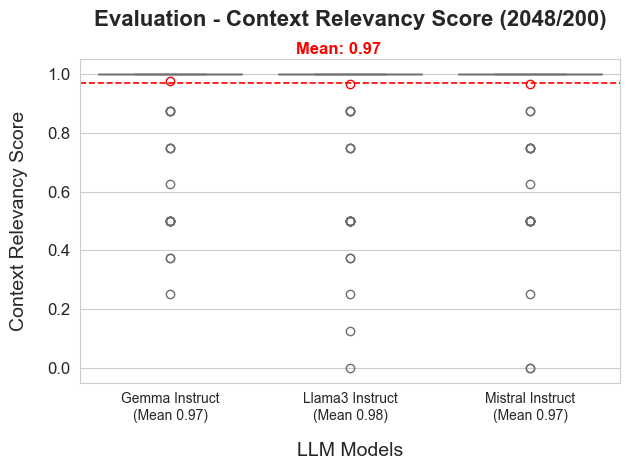

In [73]:
# boxplot
metric_a_plot = sns.boxplot(
    df,
    x="llm_model",
    y=f"{metric_a}",
    linewidth=1,
    showmeans=True,
    palette=colors,
    boxprops={"edgecolor": "k"},
    meanprops={"marker": "o", "markerfacecolor": "none", "markeredgecolor": "red"}
)

metric_a_mean = round(df[metric_a].mean(), 2)
metric_a_plot.axhline(df[metric_a].mean(), linestyle='--', color="red", linewidth=1.2)

# show mean value
metric_a_plot.text(0.7, metric_a_mean + 0.1, f'Mean: {metric_a_mean}', color='red', ha='left',
                   fontsize=12, fontweight='bold')

labels = results.keys()
labels_with_mean = [f'{label}\n(Mean {round(results[label][metric_a].mean(), 2)})' for label in labels]

metric_a_plot.set_xticklabels(labels_with_mean)
metric_a_plot.set_title(f"Evaluation - {metric_a_label} ({collection_name})", fontsize=16, fontweight='bold', pad=24)
metric_a_plot.set_xlabel("LLM Models", fontsize=14, labelpad=14)
metric_a_plot.set_ylabel(metric_a_label, fontsize=14, labelpad=14)
metric_a_plot.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

The chart shows a very high mean score 0.97. This means the context relevancy score is very high for all models. Now its interesting to see how many questions have a context relevancy score of 1.0.

In [74]:
# combine the three DataFrames and group them by their values
metric_a_values_combined = pd.concat([metric_a_values_a, metric_a_values_b, metric_a_values_c], ignore_index=True)
metric_a_values_combined

,values,context_relevancy_score,llm_model
0,1.000,293,Gemma Instruct
1,0.500,10,Gemma Instruct
2,0.875,4,Gemma Instruct
3,0.750,3,Gemma Instruct
4,0.375,2,Gemma Instruct
5,0.250,1,Gemma Instruct
6,0.000,1,Gemma Instruct
7,0.125,1,Gemma Instruct
8,1.000,296,Llama3 Instruct
9,0.500,8,Llama3 Instruct


In [75]:
metric_a_values_combined['values'] = pd.to_numeric(metric_a_values_combined['values'], errors='coerce')
metric_a_values_combined[metric_a] = pd.to_numeric(metric_a_values_combined[metric_a], errors='coerce')
metric_a_values_combined

,values,context_relevancy_score,llm_model
0,1.000,293,Gemma Instruct
1,0.500,10,Gemma Instruct
2,0.875,4,Gemma Instruct
3,0.750,3,Gemma Instruct
4,0.375,2,Gemma Instruct
5,0.250,1,Gemma Instruct
6,0.000,1,Gemma Instruct
7,0.125,1,Gemma Instruct
8,1.000,296,Llama3 Instruct
9,0.500,8,Llama3 Instruct


Display the number of questions with a context relevancy score of 1.0


In [76]:
# list all three models with the number of occurences of each value equal to 1.0
metric_a_score_a = gemma_df[metric_a].value_counts()[1.0]
metric_a_score_b = llama3_df[metric_a].value_counts()[1.0]
metric_a_score_c = mistral_df[metric_a].value_counts()[1.0]
print(f"{llm_models[0]}: {metric_a_score_a}, {llm_models[1]}: {metric_a_score_b}, {llm_models[2]}: {metric_a_score_c}")

Gemma Instruct: 293, Llama3 Instruct: 296, Mistral Instruct: 293


In [77]:
number_of_evaluated_questions

315

In [78]:
# mean of the 1.0 context relevancy score
metric_a_scores_mean = (metric_a_score_a + metric_a_score_b + metric_a_score_c) / 3

In [79]:
# sort dataframe by 'llm_model'
metric_a_values_combined = metric_a_values_combined.sort_values(by='llm_model', ascending=False)

In [80]:
metric_a_values_combined

,values,context_relevancy_score,llm_model
21,0.250,1,Mistral Instruct
20,0.625,1,Mistral Instruct
19,0.000,2,Mistral Instruct
18,0.875,2,Mistral Instruct
17,0.750,5,Mistral Instruct
16,0.500,11,Mistral Instruct
15,1.000,293,Mistral Instruct
12,0.375,2,Llama3 Instruct
14,0.625,1,Llama3 Instruct
13,0.250,1,Llama3 Instruct


In [81]:
pivot_metric_a_values_combined = metric_a_values_combined.pivot(index='values', columns='llm_model', values=metric_a)

# fill NaN values with 0
pivot_metric_a_values_combined = pivot_metric_a_values_combined.fillna(0)

# order the columns
pivot_metric_a_values_combined = pivot_metric_a_values_combined[llm_models_r]
pivot_metric_a_values_combined

llm_model,Mistral Instruct,Llama3 Instruct,Gemma Instruct
values,,,
0.000,2.0,0.0,1.0
0.125,0.0,0.0,1.0
0.250,1.0,1.0,1.0
0.375,0.0,2.0,2.0
0.500,11.0,8.0,10.0
0.625,1.0,1.0,0.0
0.750,5.0,3.0,3.0
0.875,2.0,4.0,4.0
1.000,293.0,296.0,293.0


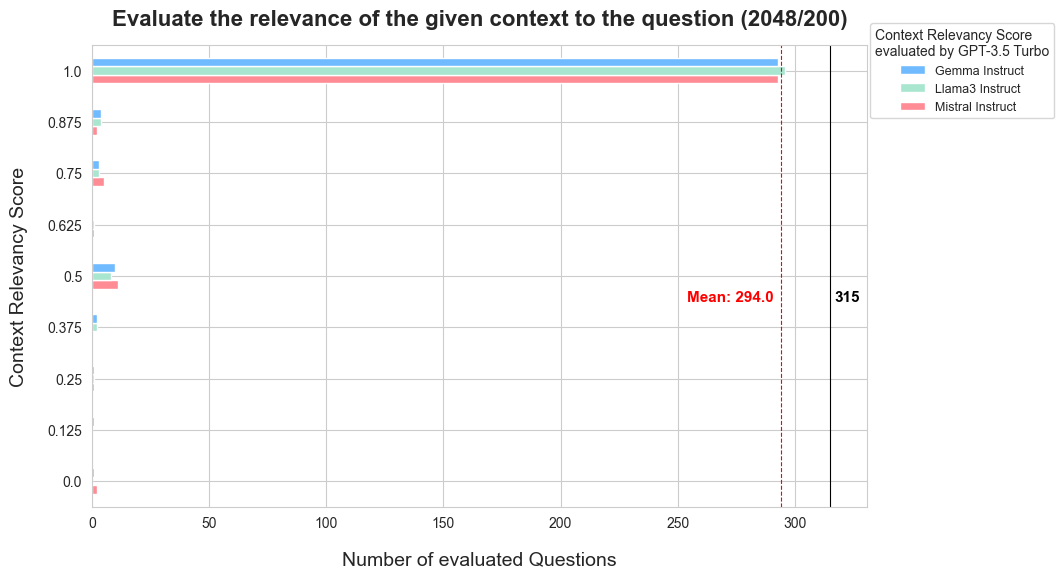

In [82]:
# display horizontal bar chart
metric_a_chart_a = pivot_metric_a_values_combined.plot(kind='barh', figsize=(10, 6), color=colors, stacked=False,
                                                       legend='reverse')
# set the labels
metric_a_chart_a.set_ylabel(metric_a_label, fontsize=14, labelpad=14)
metric_a_chart_a.set_xlabel("Number of evaluated Questions", fontsize=14, labelpad=14)
metric_a_chart_a.set_title(f"Evaluate the relevance of the given context to the question ({collection_name})", fontsize=16, fontweight='bold', pad=14)

# add number of evaluated questions as vertical line
metric_a_chart_a.axvline(x=number_of_evaluated_questions, linestyle='-', color="black", linewidth=0.8)
metric_a_chart_a.text(number_of_evaluated_questions + 2, 3.5, number_of_evaluated_questions, ha='left',
                      fontsize=11, fontweight='bold', color='black')

# add mean value as vertical line
metric_a_chart_a.axvline(x=metric_a_scores_mean, linestyle='--', color='red', linewidth=0.8)
metric_a_chart_a.text(metric_a_scores_mean - 40, 3.5, f"Mean: {round(metric_a_scores_mean, 2)}", ha='left',
                      fontsize=11, fontweight='bold', color='red')

# add legend
handles, labels = metric_a_chart_a.get_legend_handles_labels()
metric_a_chart_a.legend(
    reversed(handles),
    reversed(labels),
    title=metric_a_label + "\nevaluated by GPT-3.5 Turbo",
    loc='upper right',
    fontsize=9,
    bbox_to_anchor=(1.25, 1.06)
)

In [83]:
number_of_metric_a_score_a = metric_a_values_a[metric_a_values_a['values'] >= 0.75].sum()[metric_a]
number_of_metric_a_score_b = metric_a_values_b[metric_a_values_b['values'] >= 0.75].sum()[metric_a]
number_of_metric_a_score_c = metric_a_values_c[metric_a_values_c['values'] >= 0.75].sum()[metric_a]

In [84]:
number_of_metric_a_score_a

300

In [85]:
# now we will calculate the number of questions with a context relevancy score over 0.75
metric_a_good_results = pd.DataFrame()
metric_a_good_results['llm_model'] = llm_models
metric_a_good_results['number_of_good_results'] = [number_of_metric_a_score_a,
                                      number_of_metric_a_score_b,
                                      number_of_metric_a_score_c]

In [86]:
metric_a_good_results

,llm_model,number_of_good_results
0,Gemma Instruct,300
1,Llama3 Instruct,303
2,Mistral Instruct,300


In [87]:
metric_a_percentages = pd.DataFrame()
metric_a_percentages['llm_model'] = llm_models
metric_a_percentages['percentage'] = [round((number_of_metric_a_score_a / number_of_evaluated_questions) * 100, 2),
                                      round((number_of_metric_a_score_b / number_of_evaluated_questions) * 100, 2),
                                      round((number_of_metric_a_score_c / number_of_evaluated_questions) * 100, 2)]
metric_a_percentages

,llm_model,percentage
0,Gemma Instruct,95.24
1,Llama3 Instruct,96.19
2,Mistral Instruct,95.24


In [88]:
metric_a_percentages.sort_values(by='llm_model', ascending=False, inplace=True)
metric_a_percentages.reset_index(inplace=True, drop=True)
metric_a_percentages

,llm_model,percentage
0,Mistral Instruct,95.24
1,Llama3 Instruct,96.19
2,Gemma Instruct,95.24


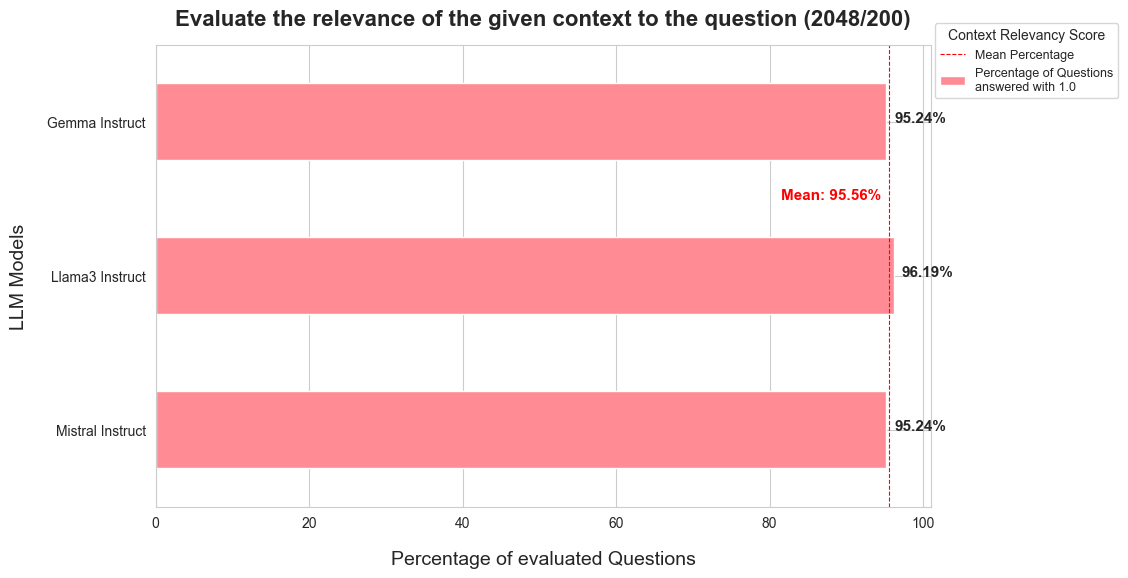

In [89]:
# display percentage values in a horizontal bar chart
metric_a_percentages_chart = metric_a_percentages.plot(kind='barh', figsize=(10, 6), color=colors)


# set the labels
metric_a_percentages_chart.set_yticklabels(llm_models_r)
metric_a_percentages_chart.set_ylabel("LLM Models", fontsize=14, labelpad=14)
metric_a_percentages_chart.set_xlabel("Percentage of evaluated Questions", fontsize=14, labelpad=14)
metric_a_percentages_chart.set_title(f"Evaluate the relevance of the given context to the question ({collection_name})", fontsize=16, fontweight='bold', pad=14)

# add percentage values to the bars
for i in range(3):
    percentage = metric_a_percentages['percentage'][i]
    metric_a_percentages_chart.text(percentage + 1, i, f'{percentage}%', ha='left', fontsize=11, fontweight='bold')

# add vertical line for the mean value
metric_a_mean_percentage = metric_a_percentages['percentage'].mean()
metric_a_percentages_chart.axvline(x=metric_a_mean_percentage, linestyle='--', color='red', linewidth=0.8)
metric_a_percentages_chart.text(metric_a_mean_percentage - 14, 1.5, f'Mean: {round(metric_a_mean_percentage, 2)}%',
                                color='red', ha='left', fontsize=11, fontweight='bold')

# add legend
metric_a_percentages_chart.legend(
    title='Context Relevancy Score',
    labels=['Mean Percentage', 'Percentage of Questions\nanswered with 1.0'],
    loc='upper right',
    fontsize=9,
    bbox_to_anchor=(1.25, 1.06),
)


### Correctness Score


In [90]:
metric_b = columns_to_compare[4]
metric_b

'correctness_score'

In [91]:
metric_b_label = "Correctness Score"

In [92]:
gemma_df[metric_b].value_counts()

correctness_score
3.0    100
4.0     70
4.5     61
2.0     43
3.5     29
2.5      7
5.0      5
Name: count, dtype: int64

In [93]:
llama3_df[metric_b].value_counts()

correctness_score
4.0    98
4.5    94
3.0    62
2.0    42
3.5    14
5.0     2
1.0     2
2.5     1
Name: count, dtype: int64

In [94]:
mistral_df[metric_b].value_counts()

correctness_score
3.0    97
4.0    92
3.5    54
4.5    29
2.0    20
2.5    15
1.0     6
5.0     2
Name: count, dtype: int64

In [95]:
# list all three models with the number of occurences of each value above 3.0
metric_b_values = pd.DataFrame()
metric_b_score_a_above_3 = gemma_df[metric_b].value_counts()[gemma_df[metric_b].value_counts().index >= 3.0]
metric_b_score_b_above_3 = llama3_df[metric_b].value_counts()[llama3_df[metric_b].value_counts().index >= 3.0]
metric_b_score_c_above_3 = mistral_df[metric_b].value_counts()[mistral_df[metric_b].value_counts().index >= 3.0]

print(f"{llm_models[0]}: {metric_b_score_a_above_3.sum()}, {llm_models[1]}: {metric_b_score_b_above_3.sum()}, {llm_models[2]}: {metric_b_score_c_above_3.sum()}")

Gemma Instruct: 265, Llama3 Instruct: 270, Mistral Instruct: 274


In [96]:
metric_b_score_a = gemma_df[metric_b].value_counts()
metric_b_score_b = llama3_df[metric_b].value_counts()
metric_b_score_c = mistral_df[metric_b].value_counts()

In [97]:
# display a bar chart
metric_b_table = pd.concat([metric_b_score_a, metric_b_score_b, metric_b_score_c], axis=1)
metric_b_table.columns = llm_models
metric_b_table = metric_b_table.fillna(0)

# sort score ascending
metric_b_table = metric_b_table.sort_values(by=metric_b, ascending=False)
metric_b_table

,Gemma Instruct,Llama3 Instruct,Mistral Instruct
correctness_score,,,
5.0,5.0,2,2
4.5,61.0,94,29
4.0,70.0,98,92
3.5,29.0,14,54
3.0,100.0,62,97
2.5,7.0,1,15
2.0,43.0,42,20
1.0,0.0,2,6


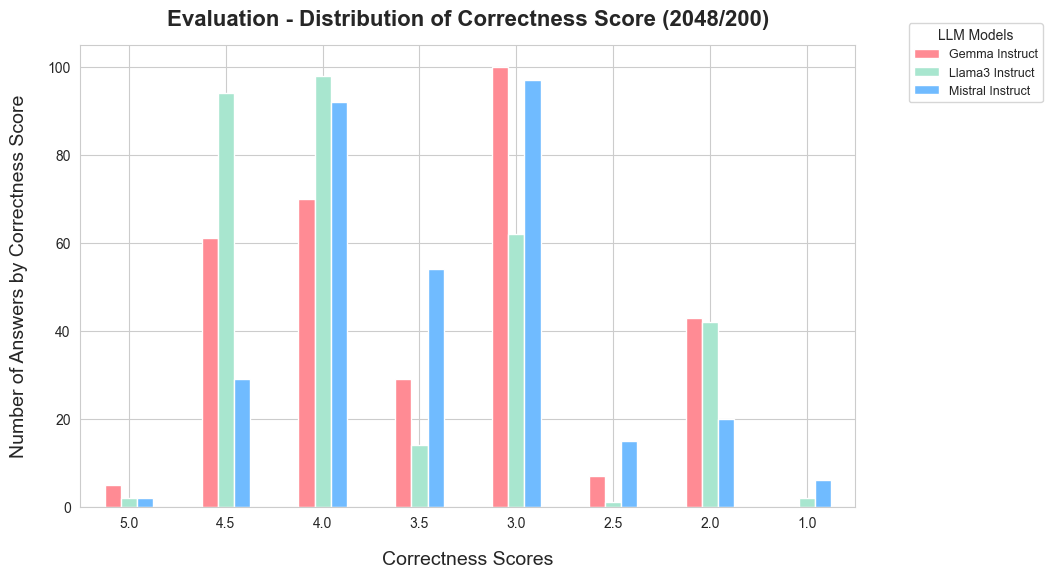

In [98]:
# display a bar chart
metric_b_table.plot(kind='bar', figsize=(10, 6), color=colors)

# set the labels
plt.xticks(rotation=0)  # horizontal x-labels
plt.xlabel("Correctness Scores", fontsize=14, labelpad=14)
plt.ylabel(f"Number of Answers by {metric_b_label}", fontsize=14, labelpad=14)
plt.title(f"Evaluation - Distribution of {metric_b_label} ({collection_name})", fontsize=16, fontweight='bold', pad=14)
plt.legend(title='LLM Models', labels=llm_models, loc='upper right', fontsize=9, bbox_to_anchor=(1.25, 1.06))

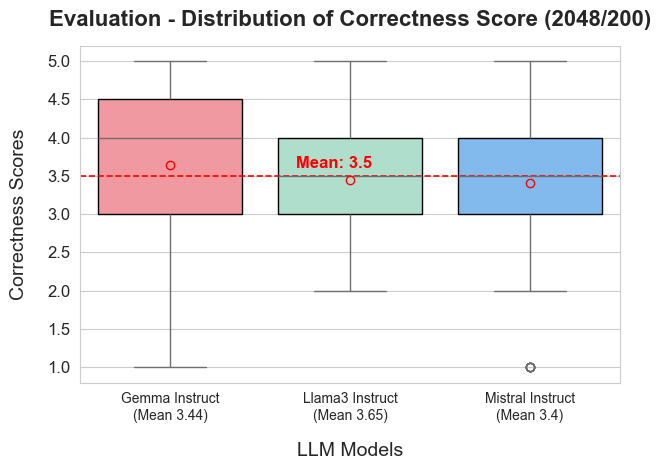

In [99]:
# create a boxplot for the correctness score
metric_b_plot = sns.boxplot(
    df,
    x="llm_model",
    y=f"{metric_b}",
    linewidth=1,
    showmeans=True,
    palette=colors,
    boxprops={"edgecolor": "k"},
    meanprops={"marker": "o", "markerfacecolor": "none", "markeredgecolor": "red"}
)
metric_b_score_mean = round(df[metric_b].mean(), 2)
metric_b_plot.axhline(df[metric_b].mean(), linestyle='--', color="red", linewidth=1.2)

# show mean value
metric_b_plot.text(0.7, metric_b_score_mean + 0.1, f'Mean: {metric_b_score_mean}', color='red', ha='left', fontsize=12,
                   fontweight='bold')

# create labels with the mean value for each model
labels = results.keys()
labels_with_mean = [f'{label}\n(Mean {round(results[label][metric_b].mean(), 2)})' for label in labels]

# set the labels
metric_b_plot.set_xticklabels(labels_with_mean)
metric_b_plot.set_title(f"Evaluation - Distribution of {metric_b_label} ({collection_name})", fontsize=16, fontweight='bold', pad=14)
metric_b_plot.set_xlabel("LLM Models", fontsize=14, labelpad=14)
metric_b_plot.set_ylabel(metric_b_label + "s", fontsize=14, labelpad=14)
metric_b_plot.tick_params(axis='y', labelsize=12)

# show the plot
plt.tight_layout()
plt.show()

The Correctness Score evaluates how correct the answer is to the given question. The mean correctness score across all models is 3.53. Llama3 Instruct has the highest mean score, while Gemma Instruct has the lowest. Despite that all Models are showing a similar consistency in performance. All Models have some outliers which means sometimes they performing very poor.

In [100]:
# print all sums
print(f"{llm_models[0]}: {metric_b_score_a.sum()}, {llm_models[1]}: {metric_b_score_b.sum()}, {llm_models[2]}: {metric_b_score_c.sum()}")

Gemma Instruct: 315, Llama3 Instruct: 315, Mistral Instruct: 315


### Faithfulness Score


In [101]:
metric_c = columns_to_compare[5]
metric_c

'faithfulness_score'

In [102]:
metric_c_label = "Faithfulness Score"

In [103]:
gemma_df[metric_c].value_counts()

faithfulness_score
1.0    275
0.0     40
Name: count, dtype: int64

In [104]:
llama3_df[metric_c].value_counts()

faithfulness_score
1.0    250
0.0     65
Name: count, dtype: int64

In [105]:
mistral_df[metric_c].value_counts()

faithfulness_score
1.0    304
0.0     11
Name: count, dtype: int64

In [106]:
# create a DataFrame for the faithfulness score values
metric_c_values_a = pd.DataFrame()
metric_c_values_a[metric_c] = gemma_df[metric_c]
metric_c_values_a['llm_model'] = llm_models[0]
print(llm_models[0])
metric_c_values_b = pd.DataFrame()
metric_c_values_b[metric_c] = llama3_df[metric_c]
metric_c_values_b['llm_model'] = llm_models[1]
print(llm_models[1])
metric_c_values_c = pd.DataFrame()
metric_c_values_c[metric_c] = mistral_df[metric_c]
metric_c_values_c['llm_model'] = llm_models[2]
print(llm_models[2])

Gemma Instruct
Llama3 Instruct
Mistral Instruct


In [107]:
metric_c_values_combined = pd.concat([metric_c_values_a, metric_c_values_b, metric_c_values_c])
metric_c_values_combined

,faithfulness_score,llm_model
3277,1.0,Gemma Instruct
3278,1.0,Gemma Instruct
3279,1.0,Gemma Instruct
3280,1.0,Gemma Instruct
3281,1.0,Gemma Instruct
...,...,...
3902,1.0,Mistral Instruct
3903,1.0,Mistral Instruct
3904,1.0,Mistral Instruct
3905,1.0,Mistral Instruct


In [108]:
metric_c_values = metric_c_values_combined.groupby('llm_model')[metric_c].value_counts(sort=True,
                                                                                       ascending=False).unstack().fillna(
    0)
metric_c_values.columns = ['zero', 'one']
metric_c_values.columns = ['zero', 'one']
metric_c_values = metric_c_values[['one', 'zero']]  # switch columns
# reverse order of 'llm_model' index
metric_c_values = metric_c_values.reindex(index=llm_models_r)
metric_c_values

,one,zero
llm_model,,
Mistral Instruct,304,11
Llama3 Instruct,250,65
Gemma Instruct,275,40


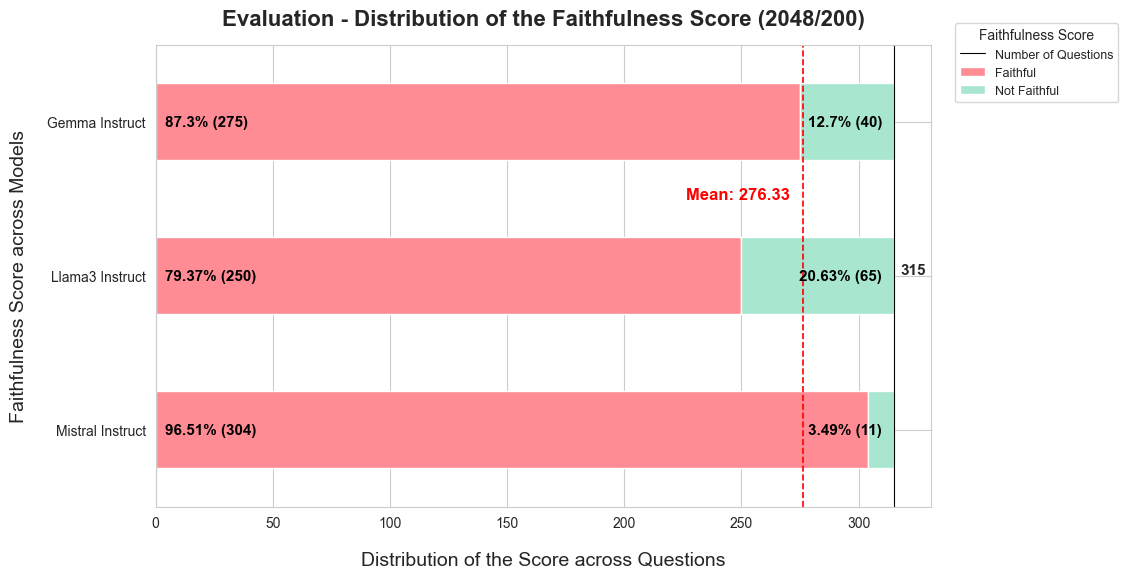

In [109]:
# create a horizontal bar chart
metric_c_hbar_chart = metric_c_values.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    color=colors[:2]
)

# display the number of evaluated questions
metric_c_hbar_chart.axvline(x=number_of_evaluated_questions, linestyle='-', color="black", linewidth=0.8)
metric_c_hbar_chart.text(318, 1.01, '315', ha='left', fontsize=11, fontweight='bold')

# set the labels
metric_c_hbar_chart.set_ylabel("Faithfulness Score across Models", fontsize=14, labelpad=14)
metric_c_hbar_chart.set_xlabel("Distribution of the Score across Questions", fontsize=14, labelpad=14)
metric_c_hbar_chart.set_title(f"Evaluation - Distribution of the {metric_c_label} ({collection_name})", fontsize=16, fontweight='bold', pad=14)

# add legend
metric_c_hbar_chart.legend(
    title='Faithfulness Score',
    labels=['Number of Questions', 'Faithful', 'Not Faithful'],
    loc='upper right',
    fontsize=9,
    bbox_to_anchor=(1.25, 1.06),
)

# display the mean as vertical line
metric_c_hbar_chart.axvline(metric_c_values['one'].mean(), color='red', linestyle='--', linewidth=1.2)
metric_c_hbar_chart.text(metric_c_values['one'].mean() - 50, 1.5,
                        f'Mean: {round(metric_c_values["one"].mean(), 2)}', color='red', ha='left', fontsize=12,
                        fontweight='bold')

# add percentage values to the bars
for i in range(3):
    num_zero = metric_c_values['zero'][i]
    num_one = metric_c_values['one'][i]
    # value 0.0
    label_a = f'{round((num_zero / number_of_evaluated_questions) * 100, 2)}% ({num_zero})'
    metric_c_hbar_chart.text(310, i-0.03, label_a, ha='right', fontsize=11, fontweight='bold', color='black')
    # value 1.0
    label_b = f'{round((num_one / number_of_evaluated_questions) * 100, 2)}% ({num_one})'
    metric_c_hbar_chart.text(4, i-0.03, label_b, ha='left', fontsize=11, fontweight='bold', color='black')


In [110]:
# list all three models with the number of occurrences of each value equal to 1.0
metric_c_score_a = gemma_df[metric_c].value_counts()[1.0]
metric_c_score_b = llama3_df[metric_c].value_counts()[1.0]
metric_c_score_c = mistral_df[metric_c].value_counts()[1.0]
print(f"{llm_models[0]}: {metric_c_score_a}, {llm_models[1]}: {metric_c_score_b}, {llm_models[2]}: {metric_c_score_c}")

Gemma Instruct: 275, Llama3 Instruct: 250, Mistral Instruct: 304


In [111]:
metric_c_percentages = pd.DataFrame()
metric_c_percentages['llm_model'] = llm_models_r
metric_c_percentages['percentage'] = [round((metric_c_score_c / number_of_evaluated_questions) * 100, 2),
                                      round((metric_c_score_b / number_of_evaluated_questions) * 100, 2),
                                      round((metric_c_score_a / number_of_evaluated_questions) * 100, 2)]
metric_c_percentages

,llm_model,percentage
0,Mistral Instruct,96.51
1,Llama3 Instruct,79.37
2,Gemma Instruct,87.30


In [112]:
metric_c_scores_sorted_list = sorted([(llms[0], metric_c_score_a), (llms[1], metric_c_score_b), (llms[2], metric_c_score_c)], key=lambda x: x[1], reverse=True)
metric_c_scores_sorted_list

[('mistral_instruct', 304), ('gemma_instruct', 275), ('llama3_instruct', 250)]

### Relevancy Score


In [113]:
metric_d = columns_to_compare[6]
metric_d

'relevancy_score'

In [114]:
metric_d_label = "Relevancy Score"

In [115]:
gemma_df[metric_d].value_counts()

relevancy_score
1.0    213
0.0    102
Name: count, dtype: int64

In [116]:
llama3_df[metric_d].value_counts()

relevancy_score
1.0    191
0.0    124
Name: count, dtype: int64

In [117]:
mistral_df[metric_d].value_counts()

relevancy_score
1.0    189
0.0    126
Name: count, dtype: int64

In [118]:
# create a DataFrame for the relevancy score values
metric_d_values_a = pd.DataFrame()
metric_d_values_a[metric_d] = gemma_df[metric_d]
metric_d_values_a['llm_model'] = llm_models[0]
print(llm_models[0])

metric_d_values_b = pd.DataFrame()
metric_d_values_b[metric_d] = llama3_df[metric_d]
metric_d_values_b['llm_model'] = llm_models[1]
print(llm_models[1])

metric_d_values_c = pd.DataFrame()
metric_d_values_c[metric_d] = mistral_df[metric_d]
metric_d_values_c['llm_model'] = llm_models[2]
print(llm_models[2])

metric_d_values_combined = pd.concat([metric_d_values_a, metric_d_values_b, metric_d_values_c])
metric_d_values = metric_d_values_combined.groupby('llm_model')[metric_d].value_counts(sort=True,
                                                                                       ascending=False).unstack().fillna(
    0)
metric_d_values.columns = ['zero', 'one']
metric_d_values = metric_d_values[['one', 'zero']]  # switch columns

Gemma Instruct
Llama3 Instruct
Mistral Instruct


In [119]:
# sort index manually
metric_d_values = metric_d_values.reindex(index=llm_models_r)
metric_d_values

,one,zero
llm_model,,
Mistral Instruct,189,126
Llama3 Instruct,191,124
Gemma Instruct,213,102


In [120]:
# display the number of questions with a relevancy score of 1.0
metric_d_score_a = gemma_df[metric_d].value_counts()[1.0]
metric_d_score_b = llama3_df[metric_d].value_counts()[1.0]
metric_d_score_c = mistral_df[metric_d].value_counts()[1.0]
# tuple with model and score
metric_d_score_list = [(llms[0], metric_d_score_a), (llms[1], metric_d_score_b), (llms[2], metric_d_score_c)]
print(f"{llm_models[0]}: {metric_d_score_a}, {llm_models[1]}: {metric_d_score_b}, {llm_models[2]}: {metric_d_score_c}")

Gemma Instruct: 213, Llama3 Instruct: 191, Mistral Instruct: 189


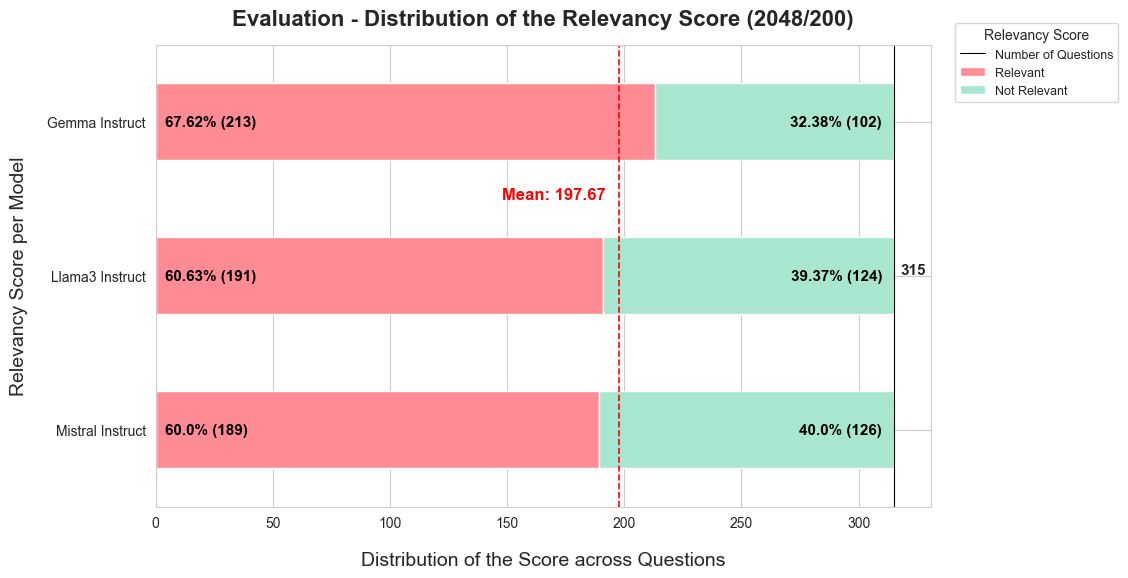

In [121]:
# create a horizontal bar chart
metric_d_hbar_chart = metric_d_values.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors[:2])
metric_d_hbar_chart.axvline(x=number_of_evaluated_questions, linestyle='-', color="black", linewidth=0.8)
metric_d_hbar_chart.text(318, 1.01, '315', ha='left', fontsize=11, fontweight='bold')
metric_d_hbar_chart.set_ylabel(metric_d_label + " per Model", fontsize=14, labelpad=14)
metric_d_hbar_chart.set_xlabel("Distribution of the Score across Questions", fontsize=14, labelpad=14)
metric_d_hbar_chart.set_title(f"Evaluation - Distribution of the {metric_d_label} ({collection_name})", fontsize=16, fontweight='bold', pad=14)
metric_d_hbar_chart.legend(
    title=metric_d_label,
    labels=['Number of Questions', 'Relevant', 'Not Relevant'],
    loc='upper right',
    fontsize=9,
    bbox_to_anchor=(1.25, 1.06),
)

# display the mean as vertical line
metric_d_hbar_chart.axvline(metric_d_values['one'].mean(), color='red', linestyle='--', linewidth=1.2)
# add text to the vertical line
metric_d_hbar_chart.text(metric_d_values['one'].mean() - 50, 1.5, f'Mean: {round(metric_d_values["one"].mean(), 2)}',
                         color='red', ha='left', fontsize=12, fontweight='bold')

# add percentage values to the bars
for i in range(3):
    num_zero = metric_d_values['zero'][i]
    num_one = metric_d_values['one'][i]
    # value 0.0
    label_a = f'{round((num_zero / number_of_evaluated_questions) * 100, 2)}% ({num_zero})'
    metric_d_hbar_chart.text(310, i - 0.03, label_a, ha='right', fontsize=11, fontweight='bold', color='black')
    # value 1.0
    label_b = f'{round((num_one / number_of_evaluated_questions) * 100, 2)}% ({num_one})'
    metric_d_hbar_chart.text(4, i - 0.03, label_b, ha='left', fontsize=11, fontweight='bold', color='black')


### Model Score

In [122]:
metric_e = columns_to_compare[7]
metric_e

'model_score'

In [123]:
metric_e_label = "Model Score"

In [124]:
gemma_df[metric_e].value_counts().sort_index(ascending=False)

model_score
1.0     25
0.5     56
0.0    234
Name: count, dtype: int64

In [125]:
llama3_df[metric_e].value_counts().sort_index(ascending=False)

model_score
1.0    109
0.5     82
0.0    124
Name: count, dtype: int64

In [126]:
mistral_df[metric_e].value_counts().sort_index(ascending=False)

model_score
1.0    204
0.5     38
0.0     73
Name: count, dtype: int64

In [127]:
# create a DataFrame for the model score values
metric_e_values_a = pd.DataFrame()
metric_e_values_a[metric_e] = gemma_df[metric_e]
metric_e_values_a['llm_model'] = llm_models[0]
print(llm_models[0])

metric_e_values_b = pd.DataFrame()
metric_e_values_b[metric_e] = llama3_df[metric_e]
metric_e_values_b['llm_model'] = llm_models[1]
print(llm_models[1])

metric_e_values_c = pd.DataFrame()
metric_e_values_c[metric_e] = mistral_df[metric_e]
metric_e_values_c['llm_model'] = llm_models[2]
print(llm_models[2])

Gemma Instruct
Llama3 Instruct
Mistral Instruct


In [128]:
metric_e_values_combined = pd.concat([metric_e_values_a, metric_e_values_b, metric_e_values_c])
metric_e_values = metric_e_values_combined.groupby('llm_model')[metric_e].value_counts(sort=True, ascending=True).unstack().fillna(0)
metric_e_values.columns = ['zero', 'half', 'one']

In [129]:
metric_e_values = metric_e_values[['one', 'half', 'zero']]  # switch columns

In [130]:
metric_e_values = metric_e_values.reindex(index=list(reversed(llm_models)))
metric_e_values

,one,half,zero
llm_model,,,
Mistral Instruct,204,38,73
Llama3 Instruct,109,82,124
Gemma Instruct,25,56,234


In [131]:
metric_e_score_a = gemma_df[metric_e].value_counts()[1.0] + gemma_df[metric_e].value_counts()[0.5]
metric_e_score_b = llama3_df[metric_e].value_counts()[1.0] + llama3_df[metric_e].value_counts()[0.5]
metric_e_score_c = mistral_df[metric_e].value_counts()[1.0] + mistral_df[metric_e].value_counts()[0.5]
print(f"{llm_models[0]}: {metric_e_score_a}, {llm_models[1]}: {metric_e_score_b}, {llm_models[2]}: {metric_e_score_c}")

Gemma Instruct: 81, Llama3 Instruct: 191, Mistral Instruct: 242


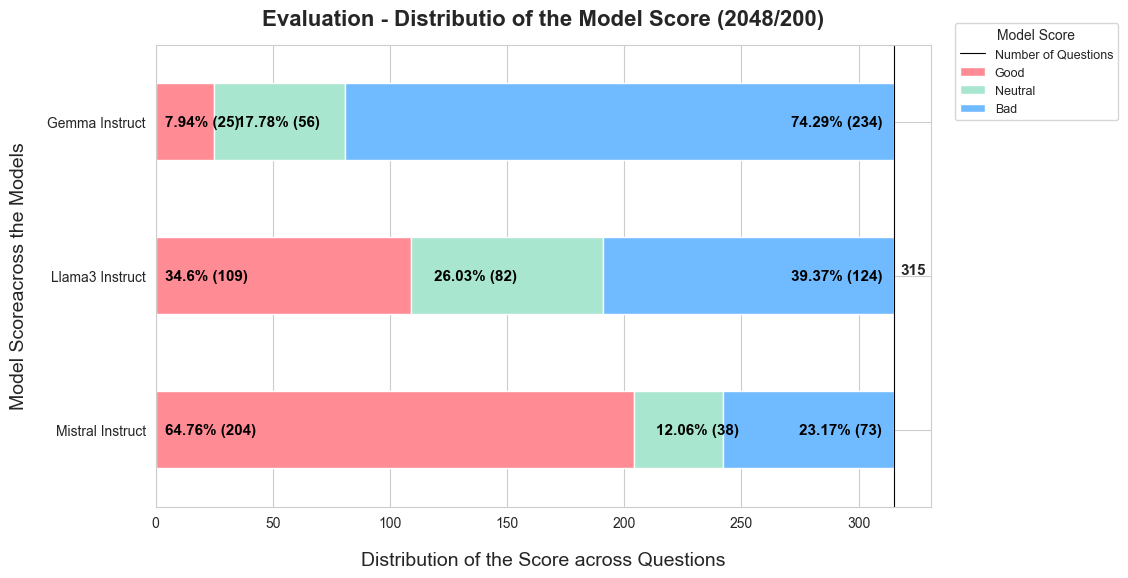

In [132]:
# create a horizontal bar chart
metric_e_hbar_chart = metric_e_values.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)
metric_e_hbar_chart.axvline(x=number_of_evaluated_questions, linestyle='-', color="black", linewidth=0.8)
metric_e_hbar_chart.text(318, 1.01, '315', ha='left', fontsize=11, fontweight='bold')
metric_e_hbar_chart.set_ylabel(metric_e_label + "across the Models", fontsize=14, labelpad=14)
metric_e_hbar_chart.set_xlabel("Distribution of the Score across Questions", fontsize=14, labelpad=14)
metric_e_hbar_chart.set_title(f"Evaluation - Distributio of the {metric_e_label} ({collection_name})", fontsize=16, fontweight='bold', pad=14)
metric_e_hbar_chart.legend(
    title=metric_e_label,
    labels=['Number of Questions', 'Good', 'Neutral', 'Bad'],
    loc='upper right',
    fontsize=9,
    bbox_to_anchor=(1.25, 1.06),
)
# add percentage values to the bars
for i in range(3):
    num_zero = metric_e_values['zero'][i]
    num_half = metric_e_values['half'][i]
    num_one = metric_e_values['one'][i]
    # value 1.0
    label_c = f'{round((num_one / number_of_evaluated_questions) * 100, 2)}% ({num_one})'
    metric_e_hbar_chart.text(4, i - 0.03, label_c, ha='left', fontsize=11, fontweight='bold', color='black')
    # value 0.5
    label_b = f'{round((num_half / number_of_evaluated_questions) * 100, 2)}% ({num_half})'
    metric_e_hbar_chart.text(num_one + 45, i - 0.03, label_b, ha='right', fontsize=11, fontweight='bold', color='black')
    # value 0.0
    label_a = f'{round((num_zero / number_of_evaluated_questions) * 100, 2)}% ({num_zero})'
    metric_e_hbar_chart.text(310, i - 0.03, label_a, ha='right', fontsize=11, fontweight='bold', color='black')

In [133]:
metric_e_scores_sorted_list = sorted([(llms[0], metric_e_score_a), (llms[1], metric_e_score_b), (llms[2], metric_e_score_c)], key=lambda x: x[1], reverse=True)
metric_e_scores_sorted_list

[('mistral_instruct', 242), ('llama3_instruct', 191), ('gemma_instruct', 81)]